In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib.image import imread
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#### X Train
X_train_original = pd.read_csv("./DATA/X_train_update.csv" , sep = ',', header = 0, index_col = 0 )
# 84916 entries
print("X_train_original.info: ", X_train_original.info())
print("X_train_original.shape: ", X_train_original.shape)

# Y Train
y_train = pd.read_csv("./DATA/Y_train_CVw08PX.csv" , sep = ',', header = 0, index_col = 0 )
# 84916 entries
print("y_train.info: ", y_train.info())
print("y_train.shape: ", y_train.shape)

Product_catalog = pd.read_csv("./DATA/product_catalog.csv", sep = ';', header = 0)
# 27 entries
print("Product_catalog.info: ", Product_catalog.info())

X_train_original['description_ok'] = X_train_original['description'].fillna('')
X_train_original['text_tag'] = X_train_original.apply(lambda row: row['designation'] + row['description_ok'], axis=1)

#compilation
r_tag = re.compile(r"<.*?>")

def text_tag_fn(text):
    text_ = ""
    for txt in text :
        text_ += txt
    return r_tag.sub(' ', text_)

#X_train_original['text']
X_train_original['text'] = X_train_original['text_tag'].apply(text_tag_fn)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB
X_train_original.info:  None
X_train_original.shape:  (84916, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   prdtypecode  84916 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB
y_train.info:  None
y_train.shape:  (84916, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   prdtypecode  27 non-null     

In [7]:
#
X_feats, X_test, y_feats, y_test = train_test_split(X_train_original, y_train['label'], test_size = 0.1, random_state=1234) # , stratify=y_train['label']
X_train, X_val, y_train, y_val = train_test_split(X_feats, y_feats, test_size = 0.2, random_state=1235)  # , stratify=y_feats


In [19]:
X_train.shape

(61139, 9)

In [20]:
#print("X_train.info: ", )
X_train.head()

,designation,description,productid,imageid,description_ok,text_tag,text,label,path
3436,Chefs-D&#39;Oeuvre De L&#39;Art Grands Peintre...,NaN,2777554861,1163967288,,Chefs-D&#39;Oeuvre De L&#39;Art Grands Peintre...,Chefs-D&#39;Oeuvre De L&#39;Art Grands Peintre...,10,./DATA/images/image_train/image_1163967288_pro...
34252,Couronne de tuyau cristal tressé armé 8 x 14 m...,NaN,158671602,914195530,,Couronne de tuyau cristal tressé armé 8 x 14 m...,Couronne de tuyau cristal tressé armé 8 x 14 m...,24,./DATA/images/image_train/image_914195530_prod...
14469,Figurine Pop - Moi Moche Et Méchant 3 - Gru Sp...,<p>- Figurine Moi Moche et Méchant 3 - <span>S...,2186863121,1130696166,<p>- Figurine Moi Moche et Méchant 3 - <span>S...,Figurine Pop - Moi Moche Et Méchant 3 - Gru Sp...,Figurine Pop - Moi Moche Et Méchant 3 - Gru Sp...,11,./DATA/images/image_train/image_1130696166_pro...
40003,Kaleidoscope And Other Short Stories - Ray Br...,NaN,1144859174,1065003296,,Kaleidoscope And Other Short Stories - Ray Br...,Kaleidoscope And Other Short Stories - Ray Br...,10,./DATA/images/image_train/image_1065003296_pro...
9185,Thermomètre Piscine Baignoire Bassin Flottant ...,<p><b>La description:</b></p><br /><p> Mesure ...,4214364235,1319429821,<p><b>La description:</b></p><br /><p> Mesure ...,Thermomètre Piscine Baignoire Bassin Flottant ...,Thermomètre Piscine Baignoire Bassin Flottant ...,12,./DATA/images/image_train/image_1319429821_pro...


In [21]:
X_val.head()

,designation,description,productid,imageid,description_ok,text_tag,text,label,path
59858,Sac Amour Créatif De Grande Capacité De Stocka...,Sac d&#39;amour créatif de grande capacité de ...,4177868919,1308942991,Sac d&#39;amour créatif de grande capacité de ...,Sac Amour Créatif De Grande Capacité De Stocka...,Sac Amour Créatif De Grande Capacité De Stocka...,5,./DATA/images/image_train/image_1308942991_pro...
38981,Motocyclette Enfant À Batterie Rouge,<p>Cette motocyclette enfant à batterie est ad...,3104462523,1191226357,<p>Cette motocyclette enfant à batterie est ad...,Motocyclette Enfant À Batterie Rouge<p>Cette m...,Motocyclette Enfant À Batterie Rouge Cette mot...,21,./DATA/images/image_train/image_1191226357_pro...
41674,Douche Pour Piscine Ajustable Échelle,Ajuste cette douche à l'échelle de ta piscine ...,1352145837,1075760275,Ajuste cette douche à l'échelle de ta piscine ...,Douche Pour Piscine Ajustable ÉchelleAjuste ce...,Douche Pour Piscine Ajustable ÉchelleAjuste ce...,12,./DATA/images/image_train/image_1075760275_pro...
8706,Fleece-Pantalon 92 Marine (408622),Fleece-Pantalon 92 marine (408622),567636972,1061538389,Fleece-Pantalon 92 marine (408622),Fleece-Pantalon 92 Marine (408622)Fleece-Panta...,Fleece-Pantalon 92 Marine (408622)Fleece-Panta...,20,./DATA/images/image_train/image_1061538389_pro...
82146,Jeu Vtech Vsmile Wall.E,NaN,3735701089,1239245340,,Jeu Vtech Vsmile Wall.E,Jeu Vtech Vsmile Wall.E,15,./DATA/images/image_train/image_1239245340_pro...


In [22]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import swifter

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olivierdouangvichith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olivierdouangvichith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
stop_words = stopwords.words(['french', 'english'])
#stop_words2 = stopwords.words('english')

In [24]:
stop_words

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [32]:
#Importer les packages nécessaires
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Définir le calque du nuage des mots
wc = WordCloud(background_color="white", max_words=300, stopwords=stop_words, max_font_size=50, random_state=1235)

In [33]:
# Définir la variable text
text_train = ""
for comment in X_train.text:
    text_train += comment

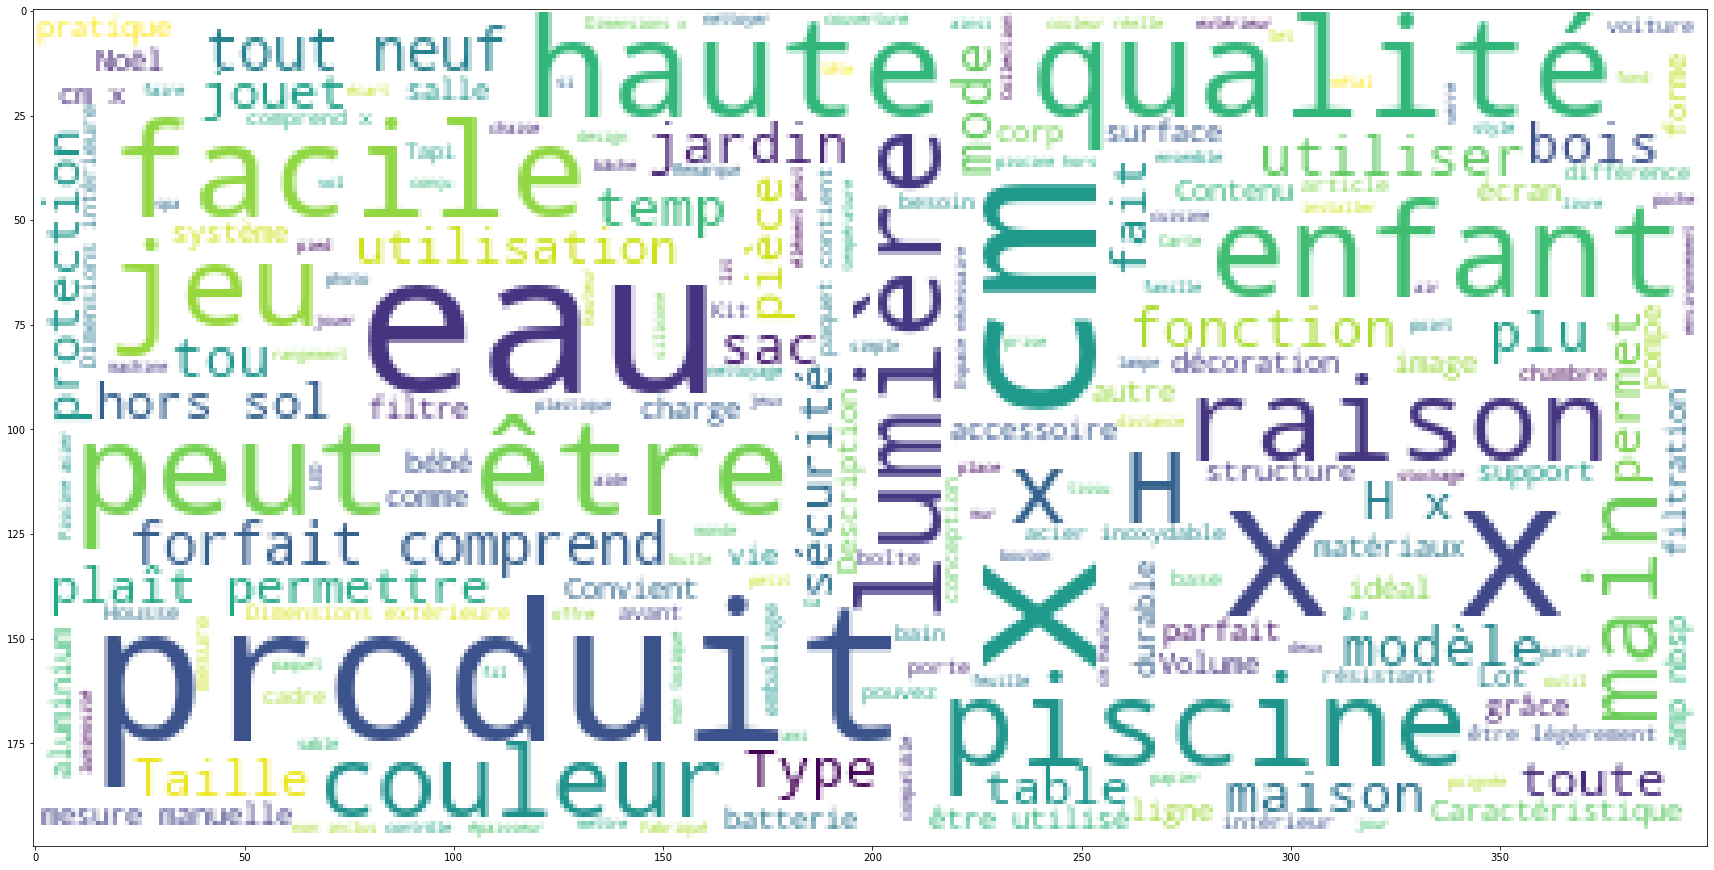

In [34]:
import matplotlib.pyplot as plt

# Générer et afficher le nuage de mots
plt.figure(figsize= (30,20)) # Initialisation d'une figure

wc.generate(text_train)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage

plt.show()

In [25]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]

    return ' '.join(mots).strip()

In [26]:
X_train.text = X_train.text.swifter.apply(lambda x :preprocess_sentence(x))
X_train.text.head(10)

Pandas Apply:   0%|          | 0/61139 [00:00<?, ?it/s]

/Users/olivierdouangvichith/opt/anaconda3/envs/python38/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


3436     chefs oeuvre art grands peintres hachette edit...
34252                   couronne tuyau cristal tresse arme
14469    figurine pop moche mechant gru spy funko pop f...
40003    kaleidoscope short stories ray bradbury lire a...
9185     thermometre piscine baignoire bassin flottant ...
362      doctor mug cosmosmug grande tasse ceramique de...
71491    carnet notes bloc notes cahierl australie save...
81758    aeternitas nasci vivere mori aeternitas histoi...
28021    ! lval destructeur dododo communesi adversaire...
19586    taie oreiller animal mignon coussin sofa case ...
Name: text, dtype: object

In [15]:
X_val.text = X_val.text.swifter.apply(lambda x :preprocess_sentence(x))
X_val.text.head(10)

Pandas Apply:   0%|          | 0/15285 [00:00<?, ?it/s]

/Users/olivierdouangvichith/opt/anaconda3/envs/python38/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


59858    sac amour creatif grande capacite stockage lav...
38981    motocyclette enfant batterie rouge cette motoc...
41674    douche piscine ajustable echelleajuste cette d...
8706         fleece pantalon marine fleece pantalon marine
82146                              jeu vtech vsmile wall .
47562                marvel legends series captain america
68326    type adaptateur audio externe microphone sans ...
6967     wizkids jeu plateau thrown anglais version ang...
60722    nappe ronde platine noirnappe ronde diametre p...
2696     adhesif transparent mastic colle chaussures br...
Name: text, dtype: object

In [249]:
X_train.text

3436     chefs oeuvre art grands peintres hachette edit...
34252                   couronne tuyau cristal tresse arme
14469    figurine pop moche mechant gru spy funko pop f...
40003    kaleidoscope short stories ray bradbury lire a...
9185     thermometre piscine baignoire bassin flottant ...
                               ...                        
42393                                arata watase kurokawa
61691                                       nuit carrefour
3613     gsm sans fil domicile systeme alarme anti intr...
68398    histoire vecue resistance francaise editions c...
74877                 trousse carre serdaigle trousse tube
Name: text, Length: 61139, dtype: object

In [27]:
import tensorflow as tf

# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)

# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_train.text)

In [28]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

In [29]:
vocab_size

10000

In [15]:
# on transforme les textes en séquence d'entiers
X_train.sequences = tokenizer.texts_to_sequences(X_train.text)
X_val.sequences = tokenizer.texts_to_sequences(X_val.text)

/var/folders/38/3tqw0pwn613884rks8sjfzdc0000gn/T/ipykernel_18497/131968552.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.sequences = tokenizer.texts_to_sequences(X_train.text)
/var/folders/38/3tqw0pwn613884rks8sjfzdc0000gn/T/ipykernel_18497/131968552.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_val.sequences = tokenizer.texts_to_sequences(X_val.text)


In [16]:
X_train.sequences

[[7272,
  12,
  2,
  4279,
  1,
  9,
  2,
  531,
  1068,
  7645,
  1621,
  1216,
  9766,
  542,
  3377,
  3625,
  15,
  5,
  329,
  66,
  1884,
  1,
  355],
 [3666, 1, 510, 1751, 4153, 4435, 79, 11, 310, 70, 151, 47, 160],
 [653,
  1484,
  3194,
  4,
  31,
  3347,
  1484,
  653,
  3194,
  4,
  31,
  1484,
  762,
  7,
  4886,
  744,
  29,
  1984],
 [60, 1412, 6524, 7953, 2094, 7, 1310],
 [2121,
  32,
  2714,
  669,
  1569,
  314,
  2407,
  19,
  1008,
  801,
  3,
  111,
  113,
  3,
  314,
  1,
  3,
  32,
  4093,
  6,
  18,
  179,
  1,
  876,
  3,
  314,
  1,
  9,
  2,
  40,
  216,
  2,
  1640,
  648,
  25,
  3,
  32,
  1413,
  3,
  314,
  7,
  664,
  1043,
  28,
  664,
  169,
  195,
  3,
  314,
  363,
  2,
  5,
  151,
  664,
  169,
  1008,
  5,
  3395,
  6,
  1477,
  8,
  2121,
  7,
  315,
  186,
  6,
  10,
  334,
  28,
  10,
  1468,
  367,
  56,
  125,
  27,
  76,
  279,
  29,
  601,
  3683,
  11,
  1423,
  21,
  11,
  6862,
  193,
  8,
  126,
  82,
  2121,
  1569,
  6,
  361,
  5,
  1

In [29]:
#list = [liste1, .... listeN]
#np.mean(list.apply(lambda x: len(x)))

seq = [len(x) for x in X_train.sequences]

xx = np.mean(seq)
yy = np.std(seq)

print(len(seq))
print(xx)
print(yy)

61139
48.503115850766285
63.0306182139923


In [30]:
# Nbr max de mot dans une sequence
# Resultat => Tableau numpy de 500 colonnes
#maxlen = 500
maxlen = 48

X_train.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_train.sequences, maxlen=maxlen, padding='post') # maxlen=maxlen,
X_val.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_val.sequences, maxlen=maxlen, padding='post') # maxlen=maxlen,

In [31]:
X_train.sequences

array([[6251, 2763,  355, ...,    0,    0,    0],
       [3048,  388, 1471, ...,    0,    0,    0],
       [ 498, 1212, 2899, ...,    0,    0,    0],
       ...,
       [  34, 1394,  846, ...,  151,   86,  319],
       [ 629,  260, 1073, ...,    0,    0,    0],
       [1854,  460, 1854, ...,    0,    0,    0]], dtype=int32)

In [150]:
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, LSTMCell, Dropout

#embedding_dim = 200
embedding_dim = 300

model = Sequential()

model.add(Embedding(10000, embedding_dim))

#model.add(RNN(GRUCell(256), return_sequences=True))
model.add(RNN(LSTMCell(256), return_sequences=True))
model.add(Dropout(0.3))

model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(27, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         3000000   
                                                                 
 rnn (RNN)                   (None, None, 256)         570368    
                                                                 
 dropout_2 (Dropout)         (None, None, 256)         0         
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [151]:
# 0.01, 0.001, 0.0001
# batch_size = 64,
optim = optimizers.Adam(learning_rate=0.001)

In [152]:
model.compile(optimizer=optim,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [153]:
history_text = model.fit(X_train.sequences, y_train.values,
                    batch_size = 64,
                    epochs=10,
                    validation_data = [X_val.sequences, y_val.values])

Epoch 1/10
956/956 [==============================] - 131s 135ms/step - loss: 1.6665 - accuracy: 0.4888 - val_loss: 1.0828 - val_accuracy: 0.6808
Epoch 2/10
956/956 [==============================] - 135s 142ms/step - loss: 0.9240 - accuracy: 0.7272 - val_loss: 0.9132 - val_accuracy: 0.7289
Epoch 3/10
956/956 [==============================] - 132s 138ms/step - loss: 0.7237 - accuracy: 0.7857 - val_loss: 0.8728 - val_accuracy: 0.7374
Epoch 4/10
956/956 [==============================] - 132s 138ms/step - loss: 0.6079 - accuracy: 0.8164 - val_loss: 0.8713 - val_accuracy: 0.7454
Epoch 5/10
956/956 [==============================] - 136s 143ms/step - loss: 0.5174 - accuracy: 0.8411 - val_loss: 0.9226 - val_accuracy: 0.7458
Epoch 6/10
956/956 [==============================] - 106s 111ms/step - loss: 0.4422 - accuracy: 0.8622 - val_loss: 0.9530 - val_accuracy: 0.7444
Epoch 7/10
956/956 [==============================] - 143s 150ms/step - loss: 0.3833 - accuracy: 0.8799 - val_loss: 1.0258 -

In [16]:
X_test.sequences = tokenizer.texts_to_sequences(X_test.text)
X_test.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_test.sequences, maxlen=maxlen, padding='post')

NameError: name 'tokenizer' is not defined

In [155]:
model.evaluate(X_test.sequences, y_test.values, batch_size=64, return_dict=True)

133/133 [==============================] - 9s 69ms/step - loss: 1.3792 - accuracy: 0.7156


{'loss': 1.3792415857315063, 'accuracy': 0.7156146764755249}

In [156]:
y_predd = model.predict(X_test.sequences)

In [158]:
predicted_class_indices = np.argmax(y_predd, axis=-1)

In [169]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mat_confis = confusion_matrix(y_test.values, predicted_class_indices)
#print(mat_confis)

In [161]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print(metrics.classification_report(y_test.values, predicted_class_indices))

              precision    recall  f1-score   support

           0       0.35      0.52      0.42       332
           1       0.68      0.54      0.60       428
           2       0.69      0.76      0.72       161
           3       0.55      0.52      0.54       496
           4       0.70      0.61      0.65       302
           5       0.87      0.86      0.87       503
           6       0.71      0.62      0.66       274
           7       0.69      0.67      0.68       500
           8       0.45      0.42      0.43       199
           9       0.84      0.90      0.87       431
          10       0.69      0.72      0.71       463
          11       0.75      0.72      0.73       273
          12       0.93      0.95      0.94      1054
          13       0.56      0.58      0.57        73
          14       0.73      0.86      0.79       482
          15       0.75      0.79      0.77       149
          16       0.83      0.78      0.80       399
          17       0.71    

In [166]:
accuracy2 = accuracy_score(y_test.values, predicted_class_indices)
print('Text Accuracy :', accuracy2)

Text Accuracy : 0.7156146961846443


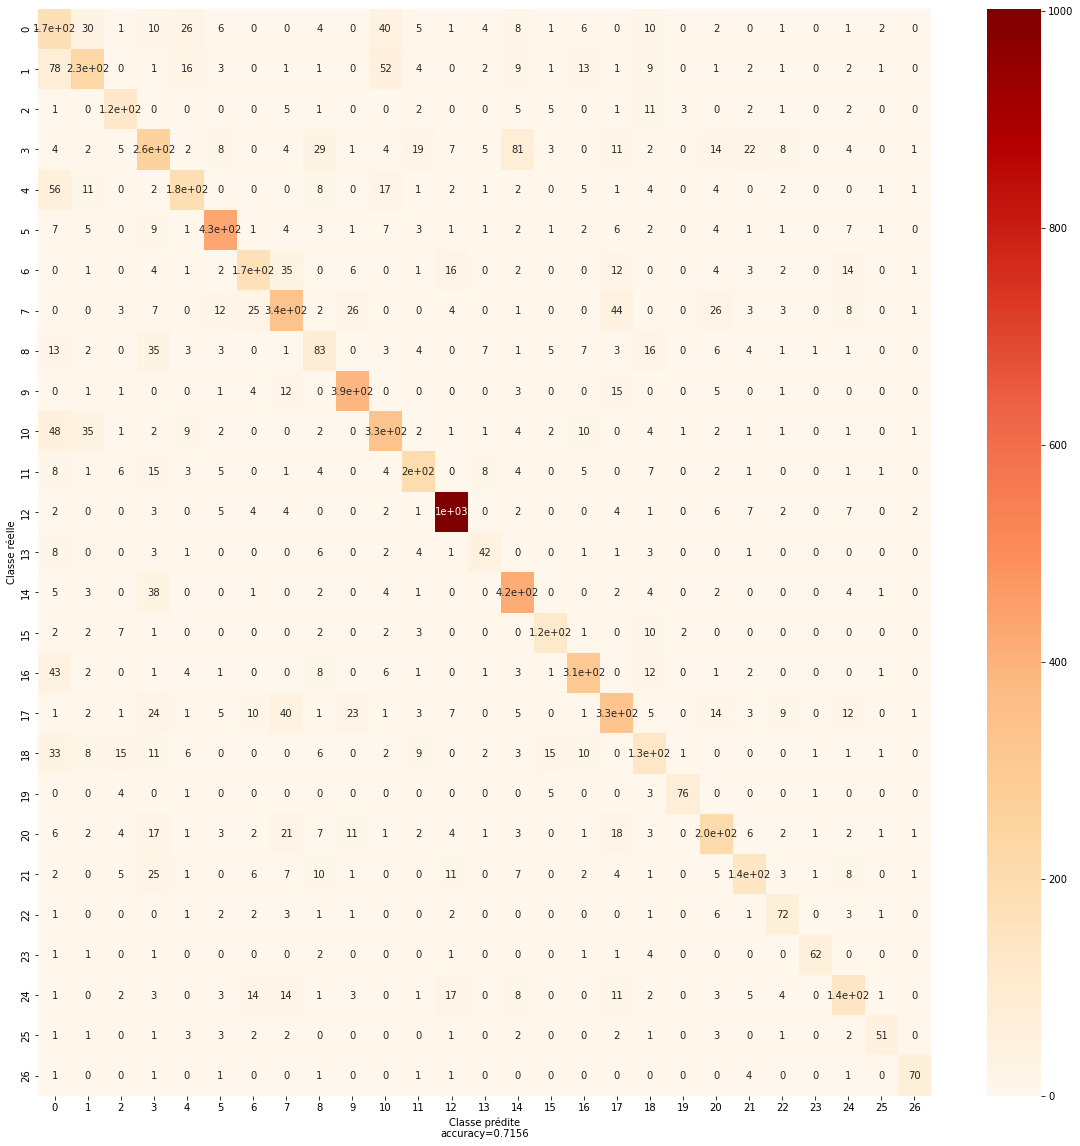

In [167]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(mat_confis, annot=True, cmap="OrRd")

plt.ylabel('Classe réelle')
plt.xlabel('Classe prédite\naccuracy={:0.4f}'.format(accuracy2))

#plt.savefig('./matrice_confusion_RNNLSTM.png')

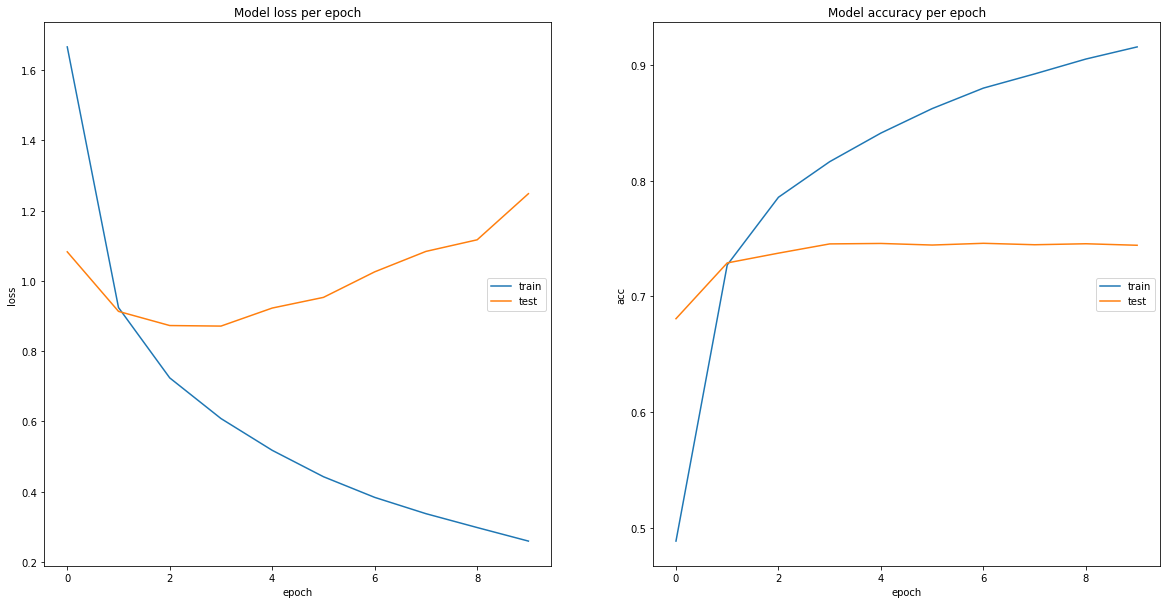

In [168]:
train_loss = history_text.history["loss"]
val_loss = history_text.history["val_loss"]

train_acc = history_text.history["accuracy"]
val_acc = history_text.history["val_accuracy"]
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss per epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy per epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

#plt.show()
#plt.savefig('./history_RNNLSTM.png')

In [163]:
# Save model
model.save('64_0.001_textClassifierRNNLSTMBow.h5', save_format='h5')

In [164]:
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################

In [374]:
# Load model
from tensorflow import keras

reconstructed_model = keras.models.load_model("64_0.001_textClassifierRNNLSTMBow.h5")

In [375]:
maxlen = 48
X_test.sequences = tokenizer.texts_to_sequences(X_test.text)
X_test.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_test.sequences, maxlen=maxlen, padding='post')

In [379]:
reconstructed_model.evaluate(X_test.sequences, y_test.values, batch_size=64, return_dict=True)

133/133 [==============================] - 8s 61ms/step - loss: 1.3792 - accuracy: 0.7156


{'loss': 1.3792415857315063, 'accuracy': 0.7156146764755249}

In [380]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

X_test.sequences = tokenizer.texts_to_sequences(X_test.text)
X_test.sequences = tf.keras.preprocessing.sequence.pad_sequences(X_test.sequences, maxlen=maxlen, padding='post')

In [381]:
y_predd = reconstructed_model.predict(X_test.sequences)

In [382]:
y_prob_text = y_predd

In [296]:
predicted_class_indices = np.argmax(y_predd, axis=-1)
mat_confus = confusion_matrix(y_test.values, predicted_class_indices)
#print(mat_confis)

Text Accuracy : 0.7156146961846443


Text(0.5, 159.0, 'Classe prédite\naccuracy=0.7156')

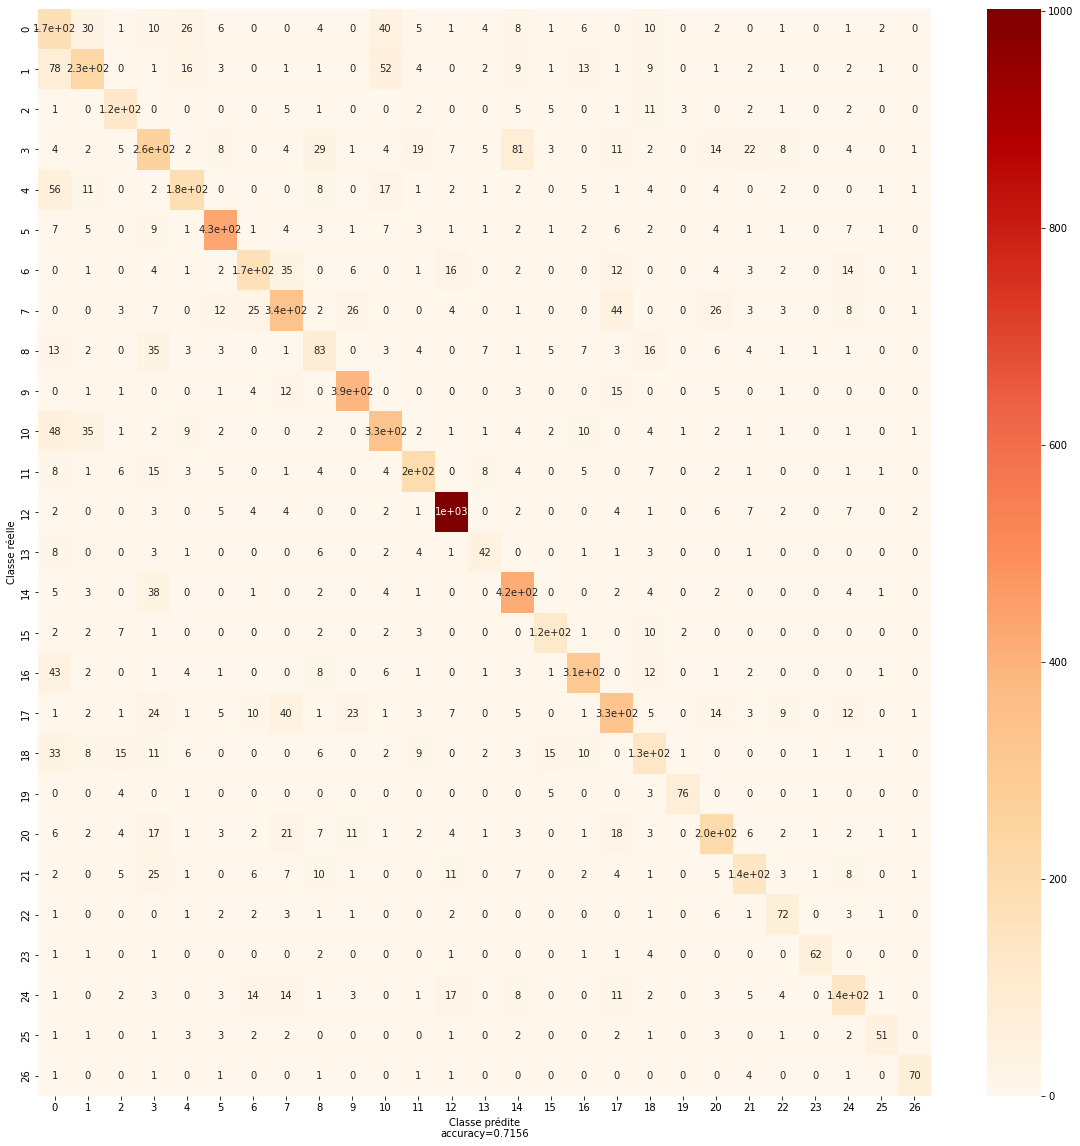

In [259]:
import seaborn as sns
from sklearn.metrics import accuracy_score

accuracy2b = accuracy_score(y_test.values, predicted_class_indices)
print('Text Accuracy :', accuracy2b)

plt.figure(figsize=(20, 20))
sns.heatmap(mat_confus, annot=True, cmap="OrRd")

plt.ylabel('Classe réelle')
plt.xlabel('Classe prédite\naccuracy={:0.4f}'.format(accuracy2b))

In [260]:
print(metrics.classification_report(y_test.values, predicted_class_indices))

              precision    recall  f1-score   support

           0       0.35      0.52      0.42       332
           1       0.68      0.54      0.60       428
           2       0.69      0.76      0.72       161
           3       0.55      0.52      0.54       496
           4       0.70      0.61      0.65       302
           5       0.87      0.86      0.87       503
           6       0.71      0.62      0.66       274
           7       0.69      0.67      0.68       500
           8       0.45      0.42      0.43       199
           9       0.84      0.90      0.87       431
          10       0.69      0.72      0.71       463
          11       0.75      0.72      0.73       273
          12       0.93      0.95      0.94      1054
          13       0.56      0.58      0.57        73
          14       0.73      0.86      0.79       482
          15       0.75      0.79      0.77       149
          16       0.83      0.78      0.80       399
          17       0.71    